In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
close_px_all = pd.read_csv('examples/stock_px.csv',
                          parse_dates=True, index_col=0)

In [3]:
close_px_all

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


In [4]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

<AxesSubplot: >

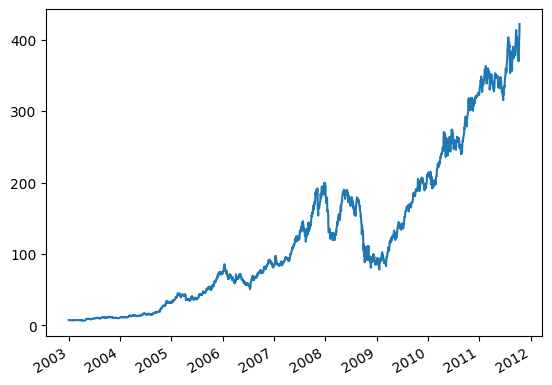

In [5]:
#now we introduce the rolling operator, which is similar to resampling and groupby.
#we can use it for moving window functions
close_px['AAPL'].plot()

<AxesSubplot: >

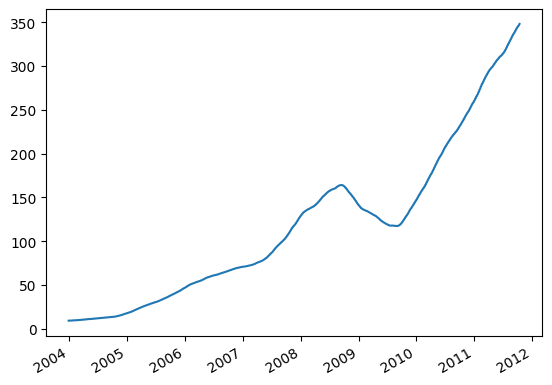

In [6]:
close_px['AAPL'].rolling(250).mean().plot()

In [7]:
#rolling(250) is similar in behavior to groupby
#rolling functions must be non-na
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [8]:
close_px['AAPL'].pct_change().rolling(250)

Rolling [window=250,center=False,axis=0,method=single]

In [9]:
std250 = close_px['AAPL'].pct_change().rolling(250, min_periods=10).std()

In [10]:
std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15         NaN
2003-01-16    0.009628
2003-01-17    0.013818
Name: AAPL, dtype: float64

<AxesSubplot: >

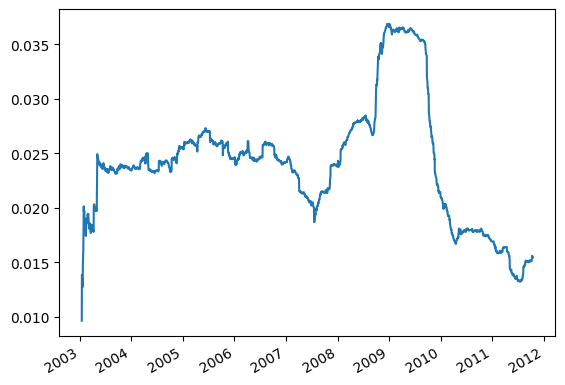

In [11]:
std250.plot()

In [12]:
#compute expanding window mean
#expanding window mean starts at the beginning of the series and gradually incorporates
#additional values
expanding_mean = std250.expanding().mean()

In [13]:
#calling a moving window function on a DataFrame applies the transformation on each column
plt.style.use('grayscale')

<AxesSubplot: >

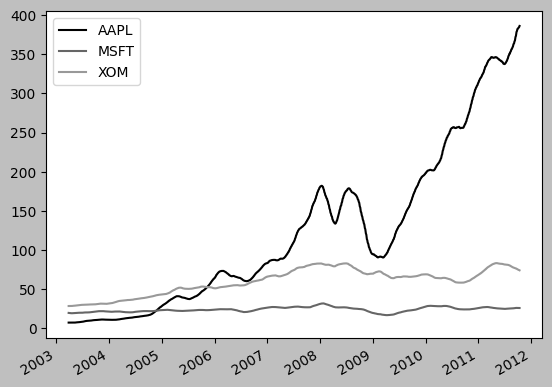

In [14]:
close_px.rolling(60).mean().plot() #without logy=True

<AxesSubplot: >

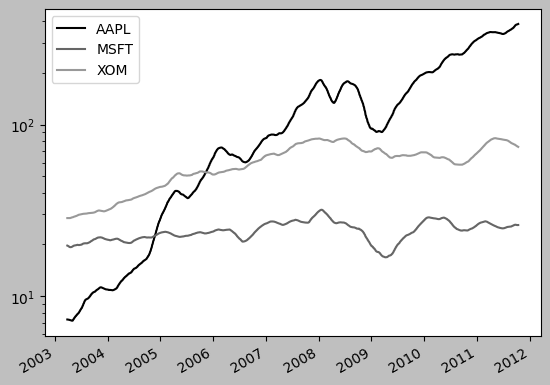

In [15]:
close_px.rolling(60).mean().plot(logy=True) #without logy=True

In [16]:
#Rolling function also accepts a string indicating a fixed-size time offset rolling.
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


In [17]:
#exponentially weighted functions
#We can specify a constant "decay factor" to give more weight to recent observations.
#span and ewm operators
aapl_px = close_px['AAPL']['2006': '2007']

In [18]:
ma30 = aapl_px.rolling(30, min_periods=20).mean()

In [19]:
ewma30 = aapl_px.ewm(span=30).mean()

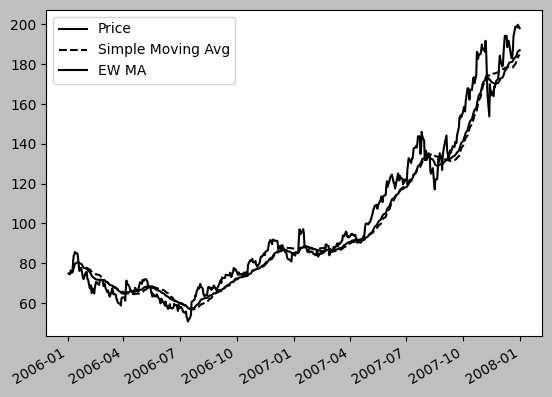

In [20]:
aapl_px.plot(style='k-', label='Price')
ma30.plot(style='k--', label='Simple Moving Avg')
ewma30.plot(style='k-', label='EW MA')
plt.legend();

In [21]:
#binary moving window functions: we want to compute functions such as correlation
#or covariance on two or more time series. 
spx_px = close_px_all['SPX']


In [22]:
spx_rets = spx_px.pct_change()

In [23]:
returns = close_px.pct_change()

In [24]:
#after we call rolling, then we can use the corr aggregation function to compile
#rolling correlation that spx_px has with spx_rets
corr = returns['AAPL'].rolling(125, min_periods=100).corr(spx_rets)

<AxesSubplot: >

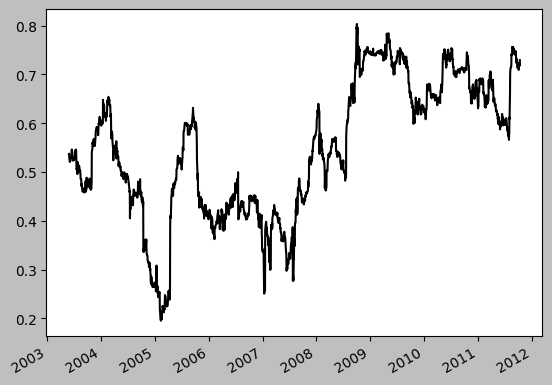

In [25]:
corr.plot()

In [26]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)

<AxesSubplot: >

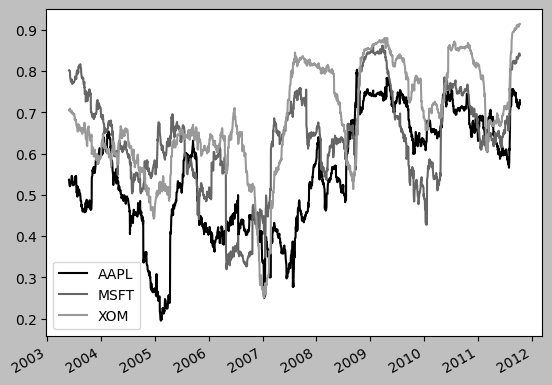

In [27]:
corr.plot()

In [28]:
from scipy.stats import percentileofscore

In [31]:
def score_at_2percent(x):
    return percentileofscore(x, 0.02)

In [32]:
result = returns['AAPL'].rolling(250).apply(score_at_2percent)

In [33]:
result

2003-01-02     NaN
2003-01-03     NaN
2003-01-06     NaN
2003-01-07     NaN
2003-01-08     NaN
              ... 
2011-10-10    92.0
2011-10-11    91.6
2011-10-12    92.0
2011-10-13    92.0
2011-10-14    91.6
Name: AAPL, Length: 2214, dtype: float64

<AxesSubplot: >

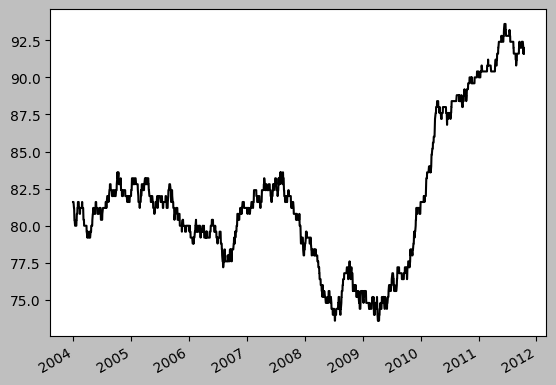

In [34]:
result.plot()